In [4]:
%reset -f
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as p

## Material parameters

In [5]:
f_t = 2.5  # [MPa]
E = 34000.0  # [MPa]
L = 300.0  # [mm]
G_f = 0.014  # [N/mm]
A = 10.0  # [mm^2]

## Softening function

In [6]:
def f(w, f_t, G_f):
    '''Softening law'''
    return f_t * np.exp(-f_t / G_f * w)


def F(w, f_t, G_f):
    '''Integral of the softening law'''
    return G_f - G_f * np.exp(-f_t / G_f * w)

l 76.16 100.0


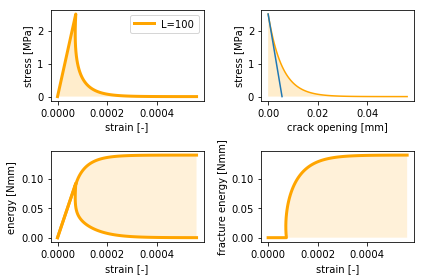

In [7]:

L_el_list = [100.0]
L_arr = np.array(L_el_list)
colors = ['orange', 'red', 'green', 'blue', 'gray', 'yellow']

w_ch = G_f / f_t
w_max = 10.0 * w_ch
w = np.linspace(0, w_max, 100)

for L, c in zip(L_arr, colors):
    # for G_f in G_f_list:

    eps_el = [0, f_t / E]
    sig_el = [0, f_t]
    eps_w = 1 / E * f(w, f_t, G_f) + w / L
    sig_w = f(w, f_t, G_f)

    W_el = [0, f_t**2 / 2 / E * A * L]
    U_el = [0, f_t**2 / 2 / E * A * L]
    W_w = 1. / 2. / E * A * L * \
        f(w, f_t, G_f)**2 + A * F(w, f_t, G_f)
    U_w = 1. / 2. / E * A * L * \
        f(w, f_t, G_f)**2 + 1. / 2. * A * f(w, f_t, G_f) * w

    eps = np.hstack([eps_el, eps_w])
    sig = np.hstack([sig_el, sig_w])
    W = np.hstack([W_el, W_w])
    U = np.hstack([U_el, U_w])

    l = E * G_f / f_t**2
    print('l', l, L)

    p.subplot(2, 2, 1)
    p.plot(eps, sig, lw=3, color=c, label='L=%d' % L)
    p.xlabel('strain [-]')
    p.ylabel('stress [MPa]')
    p.legend(loc=1)
    p.fill_between(eps, 0, sig, facecolor=c, alpha=0.2)
    p.subplot(2, 2, 2)
    p.plot(w, f(w, f_t, G_f), color=c)
    p.xlabel('crack opening [mm]')
    p.ylabel('stress [MPa]')
    p.fill_between(w, 0, f(w, f_t, G_f), facecolor=c, alpha=0.2)
    p.plot([0, w_ch], [f_t, 0])
    p.subplot(2, 2, 3)
    p.plot(eps, W, lw=3, color=c)
    p.plot(eps, U, lw=3, color=c)
    p.fill_between(eps, U, W, facecolor=c, alpha=0.15)
    p.xlabel('strain [-]')
    p.ylabel('energy [Nmm]')
    p.subplot(2, 2, 4)
    p.plot(eps, W - U, lw=3, color=c)
    p.fill_between(eps, W - U, facecolor=c, alpha=0.15)
    p.xlabel('strain [-]')
    p.ylabel('fracture energy [Nmm]')

p.tight_layout()
p.show()